<a href="https://colab.research.google.com/github/AyusheeMittal/YOLO-V3/blob/main/Eg2_yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/AyusheeMittal/YOLO-V3.git

Cloning into 'YOLO-V3'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 1601 (delta 32), reused 0 (delta 0), pack-reused 1501
Receiving objects: 100% (1601/1601), 92.50 MiB | 49.02 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [2]:
import time
import glob
import torch
import os

from IPython.display import Image as Img, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%ls

gdrive/  sample_data/  YOLO-V3/


In [5]:
%cd YOLO-V3/

/content/YOLO-V3


In [6]:
mkdir weights

In [7]:
!cp ../gdrive/'My Drive'/'eva5'/'yolov3-spp-ultralytics.pt' weights/

In [8]:
ls

cfg/   detect.py  README.md  train.py  weights/
data/  models.py  test.py    utils/    yolov3.ipynb


In [9]:
import os
import os.path
from PIL import Image

# Script to write sizes of images into .shapes file
def write_shapes(imgpaths, shapefile, append=""):
  with open(imgpaths) as f1, open(shapefile, "w") as f2:
    for line in f1:
      filepath = append + line.strip()
      if os.path.isfile(filepath):
        im = Image.open(filepath)
        width, height = im.size
        f2.write(str(width) + " " + str(height) + "\n")
      else:
        print("File does not exist, delete from paths:", filepath)
        #f2.write(str(0) + " " + str(0) + "\n")  

In [10]:
#write_shapes("data/custom.txt", "total.shapes", "")
#write_shapes("data/custom_train.txt", "train.shapes", "")
#write_shapes("data/custom_test.txt", "test.shapes", "")

In [11]:
%cd data/

/content/YOLO-V3/data


In [12]:
mkdir customdata/

In [13]:
%cd customdata/

/content/YOLO-V3/data/customdata


In [14]:
mkdir images/

In [15]:
mkdir labels/

In [16]:
mkdir testimages/

In [17]:
cd ../..

/content/YOLO-V3


In [18]:
ls

cfg/   detect.py  README.md  train.py  weights/
data/  models.py  test.py    utils/    yolov3.ipynb


In [19]:
!cp data/images/* data/customdata/images/
!cp data/labels/* data/customdata/labels/
!cp data/testimages/* data/customdata/testimages/

In [20]:
# Copy custom config files
!cp data/custom.names data/customdata/
!cp data/custom.data data/customdata/
!cp data/custom.txt data/customdata/
!cp data/custom_train.txt data/customdata/
!cp data/custom_test.txt data/customdata/
!cp data/custom.shapes data/customdata/
!cp data/train.shapes data/customdata/
!cp data/test.shapes data/customdata/

In [21]:
!python train.py --data data/customdata/custom.data --batch 16 --cache --cfg cfg/yolov3-custom1.cfg --epochs 150

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-custom1.cfg', data='data/customdata/custom.data', device='', epochs=150, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2021-01-24 14:09:54.234363: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (25 found, 0 missing, 0 empty, 0 duplicate, for 41 images): 100% 41/41 [00:00<00:00, 5444.91it/s]
Caching images (0.0GB): 100% 41/41 [00:00<00:00, 103.40it/s]
Reading image shapes: 100% 5/5 [00:00<00:00, 320.92it/s]
Caching labels (3 found, 1 missing, 0 empty, 0

In [28]:
#!rm data/customdata/testimages/TopDownHumanDetection_4032x3024.jpg
#!rm data/customdata/testimages/walking_header.jpg
#!rm data/customdata/testimages/ReadMe

In [23]:
#!cp data/testimages/TopDownHumanDetection_4032x3024.jpg data/customdata/testimages/test1.jpg
#!cp data/testimages/walking_header.jpg data/customdata/testimages/test2.jpg

In [29]:
!python detect.py --conf-thres 0.1 --cfg cfg/yolov3-custom1.cfg --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom1.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/testimages', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1 data/customdata/testimages/TopDownHumanDetection_4032x3024.jpg: 384x512 8 mans, Done. (0.037s)
Results saved to /content/YOLO-V3/out_out
Done. (0.465s)


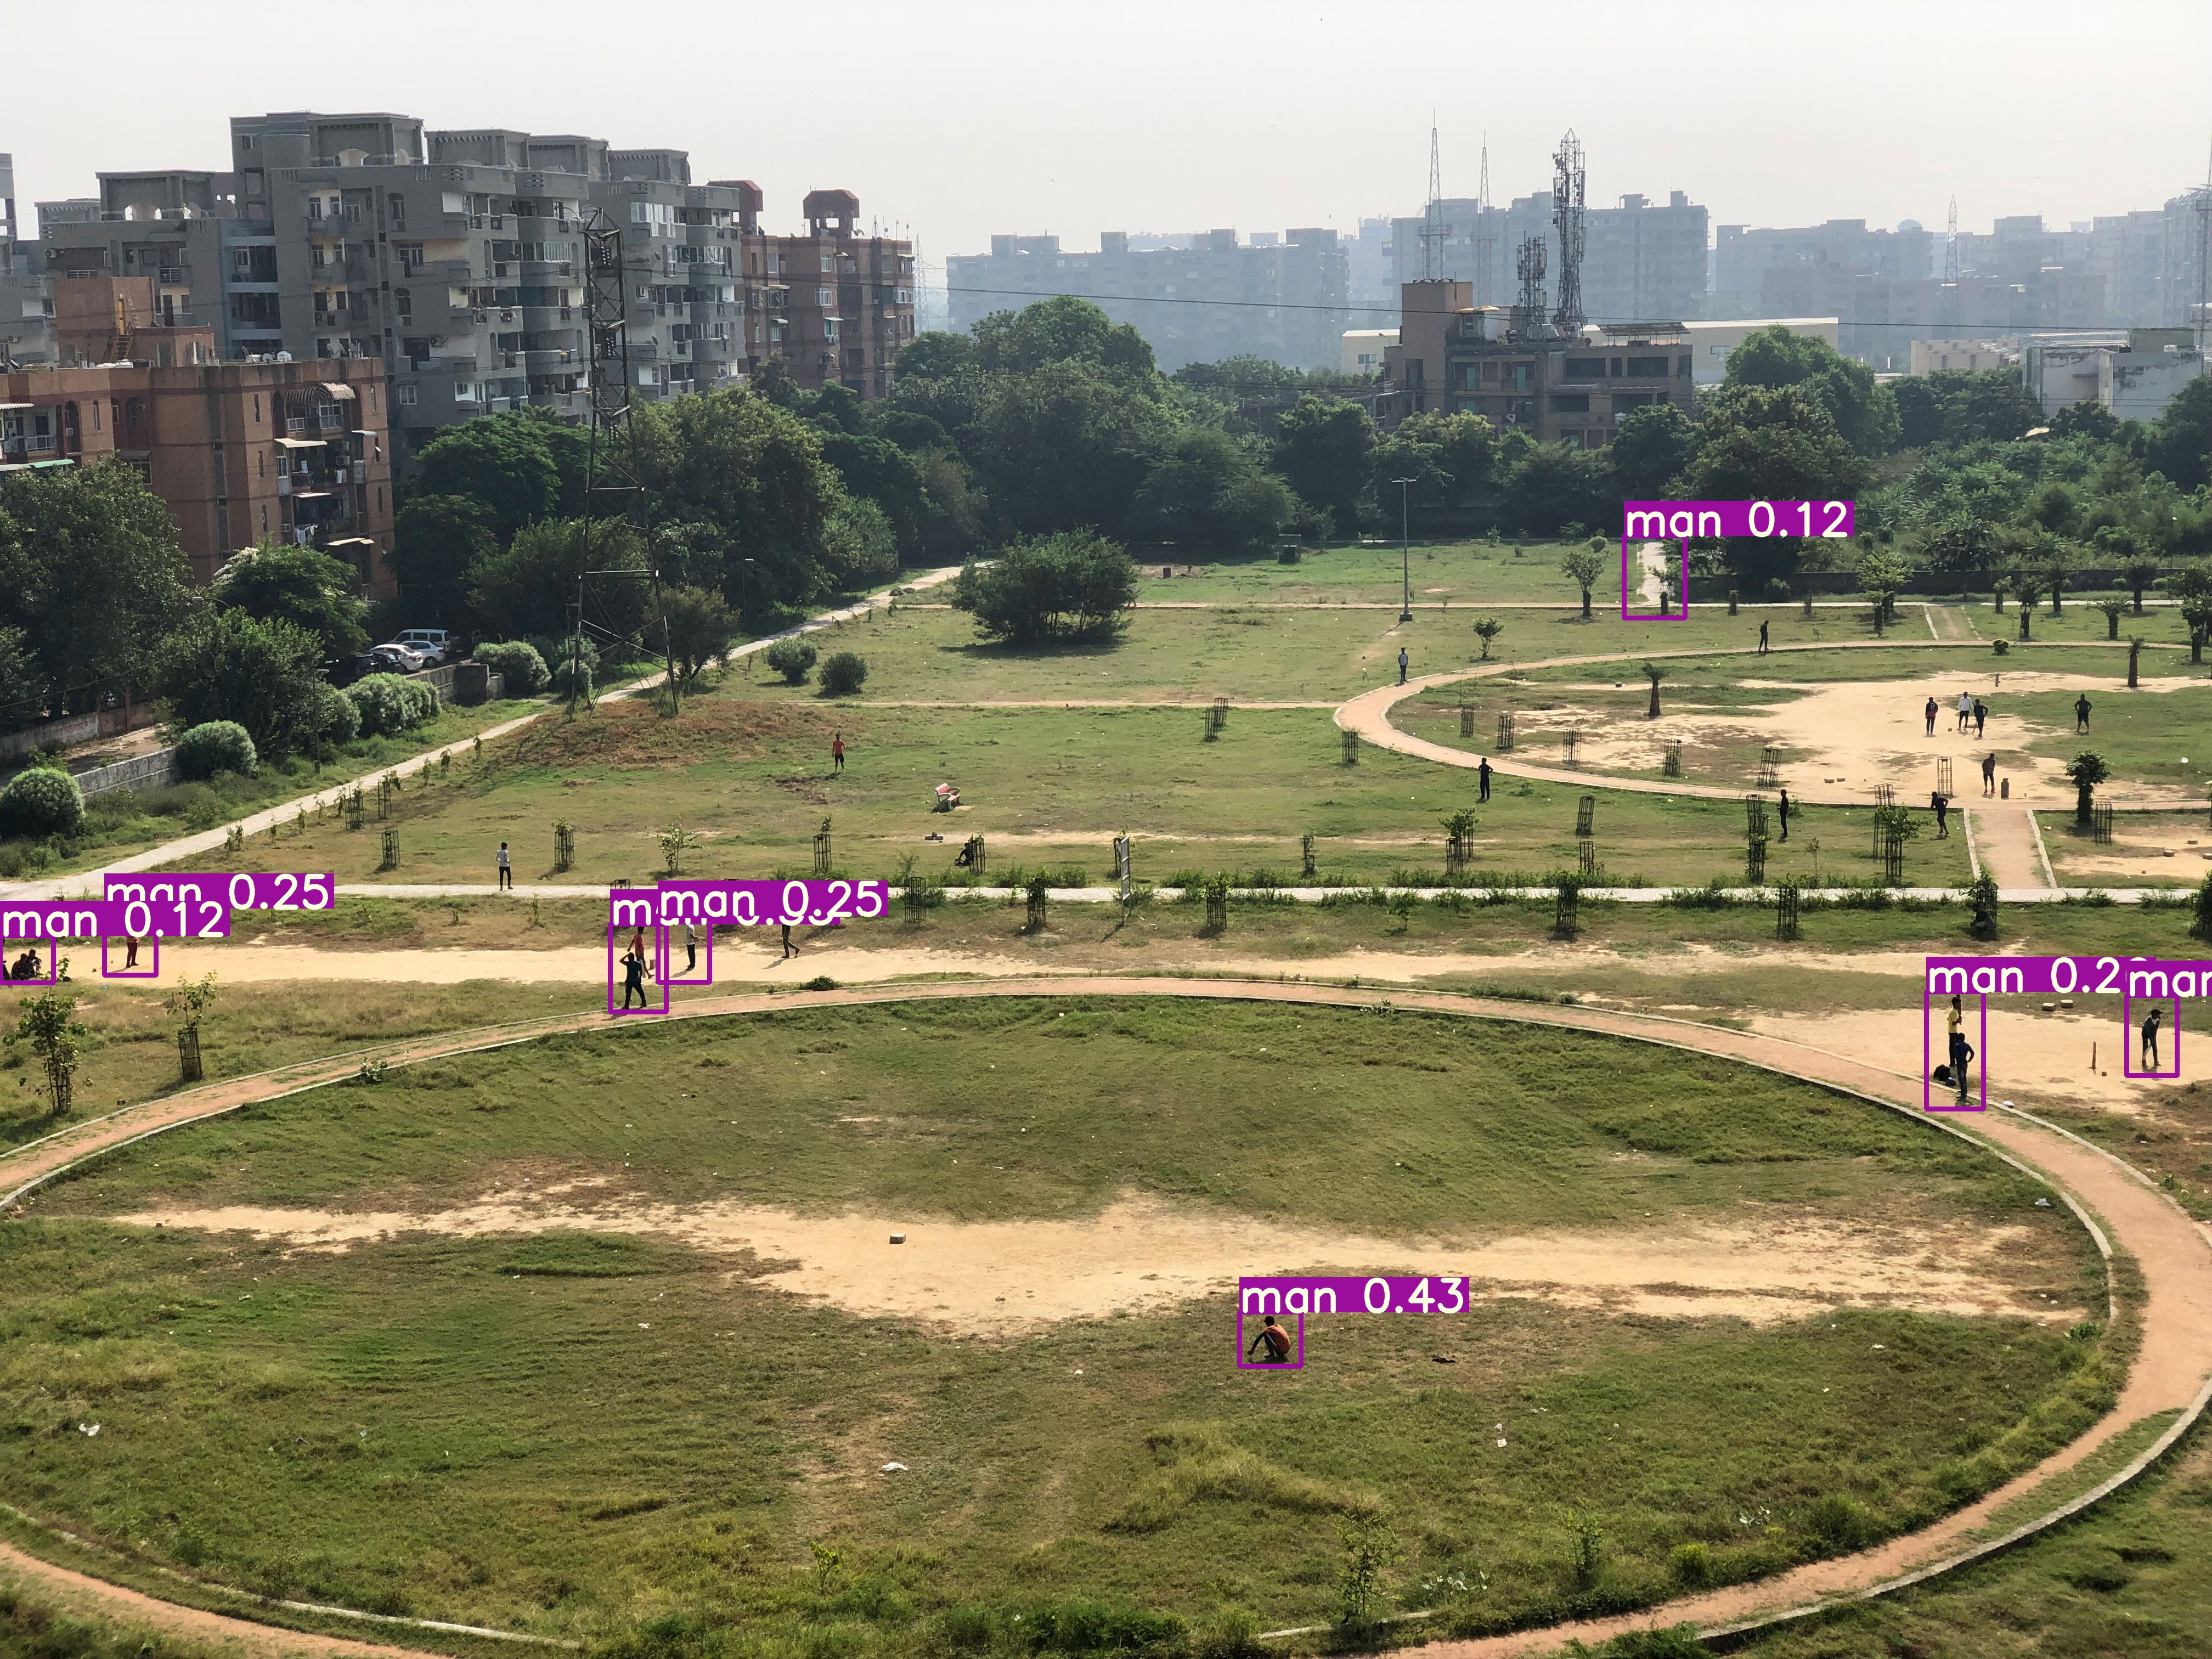

In [30]:
Img(filename='out_out/TopDownHumanDetection_4032x3024.jpg') 